In [1]:
%load_ext autoreload

%autoreload 2

In [66]:
import clean
import preproc
import pandas as pd
import numpy as np

In [64]:
from datetime import datetime

datetime_object = datetime.strptime('2008-12-31', '%y-%m-%d')

ValueError: time data '2008-12-31' does not match format '%y-%m-%d'

In [75]:
pd.to_datetime("2008-12-31").year>2010

False

In [80]:
ts_centro.ds = ts_centro.ds.map(pd.to_datetime)

In [82]:
ts_centro.dtypes

ds    datetime64[ns]
y              int64
dtype: object

# Reimport the data

In [36]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [37]:
data.dtypes

Crime_ID                  object
Crime_sub_type            object
Crime_type                object
Police_station            object
Place_type                object
Test_Date_Time            object
Date_Time         datetime64[ns]
Neighborhood              object
AR                        object
dtype: object

In [43]:
data = data[data["Date_Time"] <= "2019-12-31"]

In [44]:
data

,Crime_ID,Crime_sub_type,Crime_type,Police_station,Place_type,Test_Date_Time,Date_Time,Neighborhood,AR
0,00787401-2009,Lesão corporal dolosa,Não se aplica,043a. Pedra de Guaratiba,Praia,2009-01-01 04:30,2009-01-01 04:30:00,Pedra de Guaratiba,Guaratiba
1,01137431-2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,Residência,2009-01-01 19:00,2009-01-01 19:00:00,Santissimo,Campo Grande
2,02023941-2009,Lesão corporal dolosa,Não se aplica,040a. Honório Gurgel,Residência,2008-12-31 20:30,2008-12-31 20:30:00,Honorio Gurgel,Madureira
4,04751871-2009,Lesão corporal dolosa,Não se aplica,035a. Campo Grande,Via pública,2009-01-01 01:30,2009-01-01 01:30:00,Campo Grande,Campo Grande
5,04909311-2009,Ameaça,Não se aplica,039a. Pavuna,Residência,2009-01-01 03:03,2009-01-01 03:03:00,Ricardo de Albuquerque,Anchieta
...,...,...,...,...,...,...,...,...,...
1219355,94474991-2019,Furto de telefone celular,Furto,001a. Praça Mauá,Boate,2019-12-30 03:00,2019-12-30 03:00:00,Saude,Portuaria
1219362,96324351-2019,Roubo a transeunte,Roubo,020a. Grajaú,Via pública,2019-12-30 21:30,2019-12-30 21:30:00,Grajau,Vila Isabel
1219363,96730181-2019,Roubo em coletivo,Roubo,027a. Vicente de Carvalho,Interior de coletivo,2019-12-19 20:55,2019-12-19 20:55:00,Iraja,Iraja
1219365,98313421-2019,Furto a transeunte,Furto,012a. Copacabana,Via pública,2019-12-29 19:00,2019-12-29 19:00:00,Copacabana,Copacabana


In [45]:
data.Date_Time.max()

Timestamp('2019-12-31 00:00:00')

In [48]:
df1, df2 = preproc.get_format(data)

In [49]:
df1

nb_crimes                                                     \
AR          Anchieta Bangu Barra da Tijuca Botafogo Campo Grande Centro   
Date                                                                      
2008-12-31         4     4               3        0            6      2   
2009-01-01        10    21              15       12           38      3   
2009-01-02         5     7               3        2           26      6   
2009-01-03         1    18               5        3           16      3   
2009-01-04         1    13               2        3           19      6   
...              ...   ...             ...      ...          ...    ...   
2019-12-27         5     8              14       15           11     23   
2019-12-28         7    16              11        9           13     16   
2019-12-29         9     7               9       11            7      7   
2019-12-30         5    14              12       10            8     10   
2019-12-31         0     0               0        0            1      0   

                                                                   ...        \
AR         Cidade de Deus Complexo do Alemao Copacabana Guaratiba  ... Ramos   
Date                                                               ...         
2008-12-31              0                  0          5         5  ...     1   
2009-01-01              2                  0         10        11  ...     9   
2009-01-02              0                  0          8         2  ...     5   
2009-01-03              2                  0          6         5  ...     6   
2009-01-04              1                  0          5         2  ...     5   
...                   ...                ...        ...       ...  ...   ...   
2019-12-27              0                  0          9         2  ...     5   
2019-12-28              0                  0         19         3  ...     5   
2019-12-29              2                  1         29         1  ...     4   
2019-12-30              1                  0         10         3  ...     3   
2019-12-31              0                  0          1         0  ...     0   

                                                                  \
AR         Realengo Rio Comprido Rocinha Santa Cruz Santa Teresa   
Date                                                               
2008-12-31        4            1       0          1            1   
2009-01-01        9            7       1         22            0   
2009-01-02        5            1       0         10            2   
2009-01-03        8            3       1          5            1   
2009-01-04        7            7       0         15            0   
...             ...          ...     ...        ...          ...   
2019-12-27       11            3       0          3            1   
2019-12-28        9            2       0          2            2   
2019-12-29        9            4       0          5            2   
2019-12-30        4            0       1          5            1   
2019-12-31        0            0       0          0            0   

                                                           
AR         Sao Cristovao Tijuca Vigario Geral Vila Isabel  
Date                                                       
2008-12-31             3      1             0           0  
2009-01-01             4      2             2           7  
2009-01-02             1      4             2           5  
2009-01-03             3      3             5           2  
2009-01-04             7      2             0           1  
...                  ...    ...           ...         ...  
2019-12-27             3     12             5           7  
2019-12-28             3      3             2           8  
2019-12-29             3      3             4           4  
2019-12-30             3      6             2           5  
2019-12-31             0      0             0           0  

[4018 rows x 33 columns]

In [83]:
ts_anchieta = preproc.extract_ts(df1,"Anchieta")
ts_centro = preproc.extract_ts(df1,"Centro")

/Users/desireepetrilli/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
ts_centro

,ds,y
0,2008-12-31,2
1,2009-01-01,3
2,2009-01-02,6
3,2009-01-03,3
4,2009-01-04,6
...,...,...
4013,2019-12-27,23
4014,2019-12-28,16
4015,2019-12-29,7
4016,2019-12-30,10


In [85]:
ts_centro.dtypes

ds    datetime64[ns]
y              int64
dtype: object

# Modeling with prophet

In [53]:
from fbprophet import Prophet 

## make date as date time format

In [108]:
centro_train = ts_centro[ts_centro["ds"].dt.year<2019]

In [109]:
centro_train

,ds,y
0,2008-12-31,2
1,2009-01-01,3
2,2009-01-02,6
3,2009-01-03,3
4,2009-01-04,6
...,...,...
3648,2018-12-27,25
3649,2018-12-28,37
3650,2018-12-29,37
3651,2018-12-30,26


In [110]:
centro_test = ts_centro[ts_centro["ds"].dt.year>=2019]

In [111]:
centro_test

,ds,y
3653,2019-01-01,17
3654,2019-01-02,23
3655,2019-01-03,24
3656,2019-01-04,36
3657,2019-01-05,31
...,...,...
4013,2019-12-27,23
4014,2019-12-28,16
4015,2019-12-29,7
4016,2019-12-30,10


In [112]:
model_centro = Prophet(interval_width=0.95,
                 seasonality_mode='multiplicative')

In [113]:
model_centro.add_country_holidays(country_name='BR')

In [114]:
model_centro.fit(centro_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -7.96333


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       9592.53    0.00154725       305.061      0.1897           1      134   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       9600.05    0.00301868       282.465           1           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       9601.83    0.00120592       184.658           1           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        9604.1    0.00382884        248.99      0.6942     0.06942      506   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     478       9605.16   4.28944e-05       96.8592   1.663e-07       0.001      648  LS failed, Hessian reset 
     499       9605.18   1.61546e-05       56.4809           1           1      6

In [115]:
future = model_centro.make_future_dataframe(periods=365)

In [116]:
y_pred_centro = model_centro.predict(future)

In [117]:
y_pred_centro.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,All Souls' Day,All Souls' Day_lower,All Souls' Day_upper,Christmas,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
4013,2019-12-27,24.070331,-9.477823,60.619428,19.995102,28.579142,0.0,0.0,0.0,0.0,...,0.116301,0.116301,0.116301,-0.099132,-0.099132,-0.099132,0.0,0.0,0.0,24.483599
4014,2019-12-28,24.067548,-11.589343,58.500468,19.962878,28.602877,0.0,0.0,0.0,0.0,...,0.071954,0.071954,0.071954,-0.091432,-0.091432,-0.091432,0.0,0.0,0.0,23.598782
4015,2019-12-29,24.064765,-15.682275,52.504943,19.940774,28.626611,0.0,0.0,0.0,0.0,...,-0.091135,-0.091135,-0.091135,-0.084390,-0.084390,-0.084390,0.0,0.0,0.0,19.840795
4016,2019-12-30,24.061982,-10.189395,57.851225,19.920545,28.650346,0.0,0.0,0.0,0.0,...,0.010167,0.010167,0.010167,-0.078237,-0.078237,-0.078237,0.0,0.0,0.0,22.424095
4017,2019-12-31,24.059199,-12.453340,57.184881,19.900377,28.674080,0.0,0.0,0.0,0.0,...,-0.013960,-0.013960,-0.013960,-0.073167,-0.073167,-0.073167,0.0,0.0,0.0,21.962995


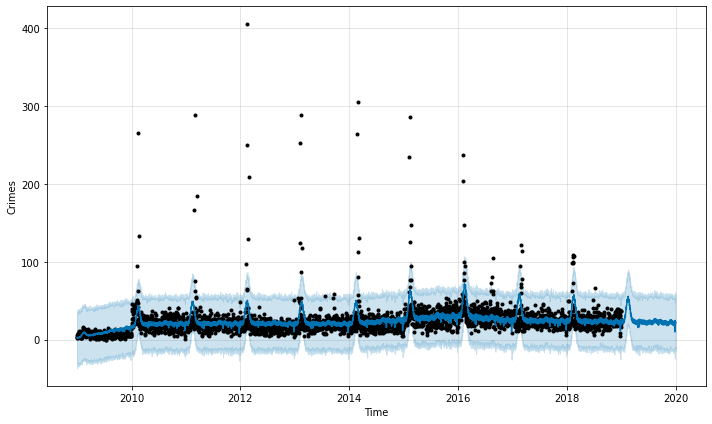

In [118]:
model_centro.plot(y_pred_centro,xlabel='Time',ylabel='Crimes');

In [119]:
import matplotlib.pyplot as plt

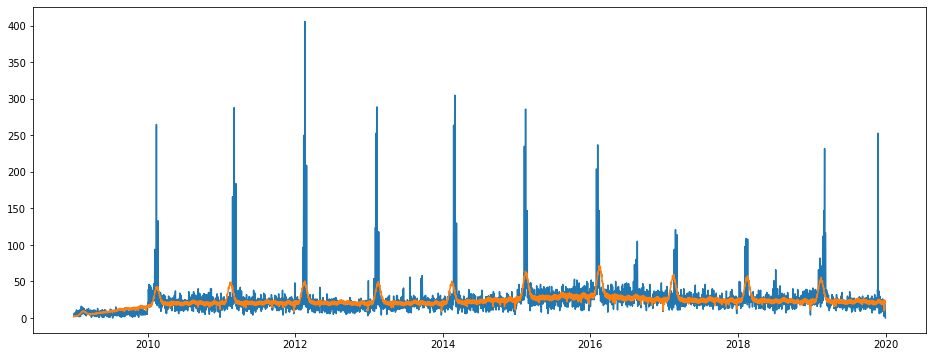

In [120]:
plt.figure(figsize=(16,6))
plt.plot(pd.concat([ts_centro.set_index("ds")["y"],y_pred_centro.set_index("ds")["yhat"]],axis=1));


In [144]:
def forecast_accuracy(forecast, actual):
    forecast = forecast.to_numpy()
    actual = actual.to_numpy()
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    #acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, #'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

In [145]:
forecast_accuracy(y_pred_centro.set_index("ds")["yhat"],ts_centro.set_index("ds")["y"])

/var/folders/7b/hgztdlzd4k76rwydg33k1vhm0000gn/T/ipykernel_70808/2213750890.py:4: RuntimeWarning: divide by zero encountered in true_divide
  mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
/var/folders/7b/hgztdlzd4k76rwydg33k1vhm0000gn/T/ipykernel_70808/2213750890.py:7: RuntimeWarning: divide by zero encountered in true_divide
  mpe = np.mean((forecast - actual)/actual)   # MPE


{'mape': inf,
 'me': 0.04364702105824374,
 'mae': 8.032641883474417,
 'mpe': inf,
 'rmse': 18.016017477363416,
 'corr': 0.4596363996222512,
 'minmax': 0.25603279774564636}

In [141]:
ts_centro_real = ts_centro.set_index("ds")["y"].to_numpy()

In [130]:
corr()y_pred_centro["yhat"]

0        2.089965
1        1.733456
2        2.570148
3        2.503893
4        2.130014
          ...    
4013    24.483599
4014    23.598782
4015    19.840795
4016    22.424095
4017    21.962995
Name: yhat, Length: 4018, dtype: float64